In [47]:
import numpy as np
from scipy.sparse import diags
from scipy.stats import norm
from IPython import display
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 15

Define ODE as heat equation:

$u_t = u_{x,x}$

on a grid of $N$ spatial points with boundary conditions of $u(0,t)=u(N,t)=0$.

Define finite difference stencil with space discretised as $\left[j, j+1, ... \right]$ and time discretised as $\left[n, n+1, ... \right]$:

$\dfrac{v_j^{n+1}-v_j^n}{k}=\dfrac{v_{j+1}^n-2v_{j}^n+v_{j-1}^n}{h^2}$

The spatial grid spacing is $h$ and the temporal grid spacing is $k$

Stencil can be recast as a matrix multiplication involving a tridiagonal matrix with $a$ on the leading diagonal and $b$ on both the adjacent diagonals

In [64]:
# Define constants

N = 20  # Number of space steps
h = 1  # Space step
k = 0.4*h**2  # Time step

a = 1 - 2*k/h**2  # Leading diagonal
b = k/h**2  # Super/Sub diagonal

# Stencil matrix
diagonals = [[a]*N, [b]*(N-1), [b]*(N-1)]
A = diags(diagonals, [0, -1, 1]).toarray()

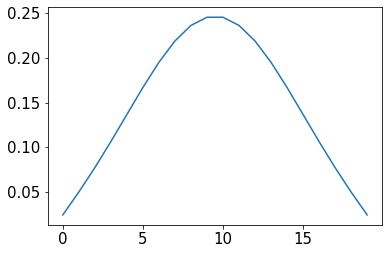

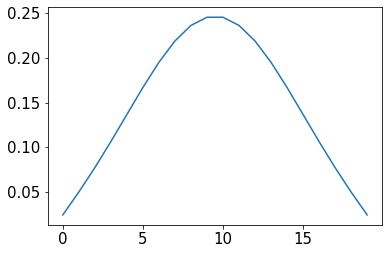

In [67]:
# Define vector describing the initial state at time n = 0
v = norm.pdf(np.linspace(-3, 3, N))

# Loop and plot the newly calculated state at each time increment
for time in range(N):
    v = np.matmul(A, v)

    #plt.pause(1)
    plt.plot(v)
    display.clear_output(wait=True)
    display.display(plt.gcf())
    plt.pause(0.01)

    #v = v_new.copy()

In [40]:
dir(time)

['__abs__',
 '__add__',
 '__and__',
 '__bool__',
 '__ceil__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floor__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getnewargs__',
 '__gt__',
 '__hash__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__le__',
 '__lshift__',
 '__lt__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rfloordiv__',
 '__rlshift__',
 '__rmod__',
 '__rmul__',
 '__ror__',
 '__round__',
 '__rpow__',
 '__rrshift__',
 '__rshift__',
 '__rsub__',
 '__rtruediv__',
 '__rxor__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__trunc__',
 '__xor__',
 'bit_length',
 'conjugate',
 'denominator',
 'from_bytes',
 'imag',
 'numerator',
 'real',
 'to_bytes']